In [1]:
import pandas as pd
import numpy as np
import time
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt


In [2]:
'''DATA SOURCE
https://www.kaggle.com/datasets/devzohaib/mushroom-edibility-classification
'''

'DATA SOURCE\nhttps://www.kaggle.com/datasets/devzohaib/mushroom-edibility-classification\n'

In [3]:
'''
1.One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables (n: nominal, m: metrical)

2.cap-diameter (m): float number in cm
3.cap-shape (n): bell=b, conical=c, convex=x, flat=f,
4.sunken=s, spherical=p, others=o
5.cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
6.shiny=h, leathery=l, silky=k, sticky=t,
7.wrinkled=w, fleshy=e
8.cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
9.purple=u, red=e, white=w, yellow=y, blue=l,
10.orange=o, black=k
11.does-bruise-bleed (n): bruises-or-bleeding=t,no=f
12.gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
13.sinuate=s, pores=p, none=f, unknown=?
14.gill-spacing (n): close=c, distant=d, none=f
15.gill-color (n): see cap-color + none=f
16.stem-height (m): float number in cm
'''

'\n1.One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).\nTwenty remaining variables (n: nominal, m: metrical)\n\n2.cap-diameter (m): float number in cm\n3.cap-shape (n): bell=b, conical=c, convex=x, flat=f,\n4.sunken=s, spherical=p, others=o\n5.cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,\n6.shiny=h, leathery=l, silky=k, sticky=t,\n7.wrinkled=w, fleshy=e\n8.cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,\n9.purple=u, red=e, white=w, yellow=y, blue=l,\n10.orange=o, black=k\n11.does-bruise-bleed (n): bruises-or-bleeding=t,no=f\n12.gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,\n13.sinuate=s, pores=p, none=f, unknown=?\n14.gill-spacing (n): close=c, distant=d, none=f\n15.gill-color (n): see cap-color + none=f\n16.stem-height (m): float number in cm\n'

In [4]:
data = pd.read_csv('secondary_data.csv',delimiter=';')
print(data)

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

In [5]:
#Assigning Attributes
X = data[[
    'cap-diameter',
    'cap-shape',
    'cap-surface',
    'cap-color',
    'does-bruise-or-bleed',
    'gill-attachment',
    'gill-spacing',
    'gill-color',
    'stem-height',
    'stem-width',
    'stem-root',
    'stem-surface',
    'stem-color',
    'veil-type',
    'veil-color',
    'has-ring',
    'ring-type'
]].values

y = data [[
    'class'
]]

In [6]:
'''Check for null values'''
print(data.isnull().sum())

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [7]:
'''Removing colums where amount of NULL is near amount of samples'''
data = data.drop('spore-print-color', axis=1)
data = data.drop('veil-color', axis=1)
data = data.drop('veil-type', axis=1)
data = data.drop('stem-surface', axis=1)
data = data.drop('stem-root', axis=1)
data = data.drop('gill-spacing', axis=1)
print(data.isnull().sum())

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64


In [8]:
'''Now we want to drop any rows that have NULL values'''
data = data.dropna(how='any',axis=0)
print(data.isnull().sum())
print(data)

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64
      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s 

In [9]:
#Check for NULL values again
print(data.isnull().sum())

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [10]:
'''Display information about the dataset'''
print(data.info())#Get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37065 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 37065 non-null  object 
 1   cap-diameter          37065 non-null  float64
 2   cap-shape             37065 non-null  object 
 3   cap-surface           37065 non-null  object 
 4   cap-color             37065 non-null  object 
 5   does-bruise-or-bleed  37065 non-null  object 
 6   gill-attachment       37065 non-null  object 
 7   gill-color            37065 non-null  object 
 8   stem-height           37065 non-null  float64
 9   stem-width            37065 non-null  float64
 10  stem-color            37065 non-null  object 
 11  has-ring              37065 non-null  object 
 12  ring-type             37065 non-null  object 
 13  habitat               37065 non-null  object 
 14  season                37065 non-null  object 
dtypes: float64(3), obje

In [11]:
#We need to re-define X with only the colums without null values
X_removed = data[[
    'cap-diameter',
    'cap-shape',
    'cap-color',
    'does-bruise-or-bleed',
    'gill-color',
    'stem-height',
    'stem-width',
    'stem-color',
    'has-ring',
    'habitat',
    'season'
]].values
#print(X)

#Redifine y here for clarity
y = data [[
    'class'
]]
#print(y['class'])

In [12]:
'''
Convert class e,p to numbers 0,1
Convert all other classifcations to numbers 
'''
Le = LabelEncoder()#Convert all data in X to numbers so it can be used
for i in range(len(X_removed[0])):#Iterate over all instances in X
    X_removed[:, i] = Le.fit_transform(X_removed[:, i])#Transform to number using fit_transform


label_mapping = { #Create a dict for e(edible) and p(poisonous)
    'e':0, #Assign 'e' as 0
    'p':1 #Assign 'p' as 1
}
y['class'] = y['class'].map(label_mapping)
y = np.array(y)#Make y an array
y=np.ravel(y)#Make y a 1D array

print(X_removed,y)#Check to make sure transormations happened

[[1471 6 6 ... 1 0 3]
 [1603 6 6 ... 1 0 2]
 [1352 6 6 ... 1 0 3]
 ...
 [73 5 11 ... 0 0 2]
 [70 2 11 ... 0 0 2]
 [63 5 11 ... 0 0 2]] [1 1 1 ... 1 1 1]


C:\Users\Ben\AppData\Local\Temp\ipykernel_23496\1784547203.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(label_mapping)


In [28]:
'''
To start lets make n_neighbours = sqrt(number of samples)
n_neighbours = sqrt(37065) = 192.52 -> 193
and use the default parameters for weights and algorithm.
'''
kNeighbors = KNeighborsClassifier(n_neighbors=193, weights='uniform', algorithm='auto')

In [29]:
'''Train model with all X_values'''
def train_model(model):#Function to train with selected model
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    return round(metrics.accuracy_score(y_test, prediction), 3), classification_report(y_test, prediction, target_names = ['edible(0)', 'poisonous(1)'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_removed, y, test_size=0.25)
kN_accuracy, kN_report = train_model(kNeighbors)

In [33]:
print("Accuracy:{}\n{}".format(kN_accuracy, kN_report))

Accuracy:0.818
              precision    recall  f1-score   support

   edible(0)       0.81      0.79      0.80      4188
poisonous(1)       0.83      0.84      0.84      5079

    accuracy                           0.82      9267
   macro avg       0.82      0.81      0.82      9267
weighted avg       0.82      0.82      0.82      9267



In [27]:
'''Get average acc for optimising'''
'''Get average accuracy for KNeighbors with uncleaned data'''
'''The number of repetitions can be increased to get more consitent results'''
total = 0
reps=5
kNeighbors = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto')#We will define again for clarity
for i in range (reps):
    X_train, X_test, y_train, y_test = train_test_split(X_removed, y, test_size=0.2)#Split the dataset
    kN_accuracy, kN_report = train_model(kNeighbors)#Model with KNeighbors and uncleaned data
    total+=kN_accuracy#Add each accuracy reading to total
kN_average_unclean = total/reps#Get average by dividing total by number of repetitions
print("KNeigbors Data Average Accuracy:{}".format(round(kN_average_unclean,3)))

KNeigbors Data Average Accuracy:0.837


Minimum error:- 0.15528218409409733 at K = 25


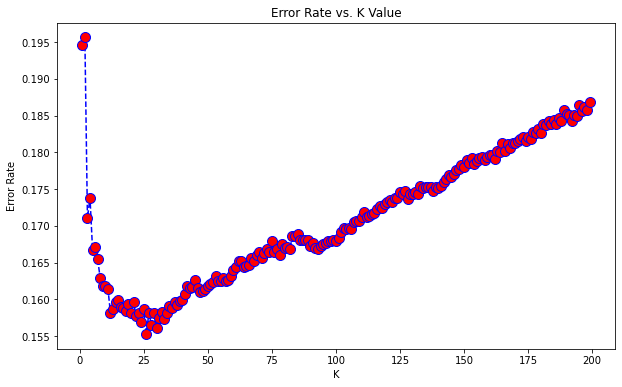

In [24]:
'''
Finding the optimal value for K
Generally is N where N^2 = number of samples
so would be k = sqrt(37065) -> 192.52
Below we are calculating the error rate for each value of K and then plotting it on a graph
'''

error_rate = []
for i in range(1,200):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8447178159059027 at K = 25


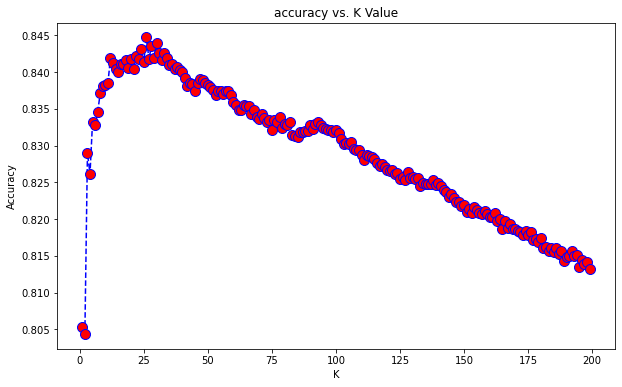

In [25]:
'''We can confirm this value of K further by doing accuracy tests from k=1 to k=200'''
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,200):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,200),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))